In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

Epoch 1/50
32/32 [==============================] - 6s 44ms/step - loss: 0.6920 - accuracy: 0.0108 - val_loss: 0.6863 - val_accuracy: 0.0196
Epoch 2/50
32/32 [==============================] - 0s 10ms/step - loss: 0.6914 - accuracy: 0.0098 - val_loss: 0.6864 - val_accuracy: 0.0196
Epoch 3/50
32/32 [==============================] - 0s 10ms/step - loss: 0.6907 - accuracy: 0.0098 - val_loss: 0.6862 - val_accuracy: 0.0196
Epoch 4/50
32/32 [==============================] - 0s 10ms/step - loss: 0.6901 - accuracy: 0.0089 - val_loss: 0.6852 - val_accuracy: 0.0196
Epoch 5/50
32/32 [==============================] - 0s 9ms/step - loss: 0.6897 - accuracy: 0.0089 - val_loss: 0.6845 - val_accuracy: 0.0196
Epoch 6/50
32/32 [==============================] - 0s 9ms/step - loss: 0.6893 - accuracy: 0.0108 - val_loss: 0.6809 - val_accuracy: 0.0196
Epoch 7/50
32/32 [==============================] - 0s 9ms/step - loss: 0.6893 - accuracy: 0.0098 - val_loss: 0.6808 - val_accuracy: 0.0196
Epoch 8/50
32/32

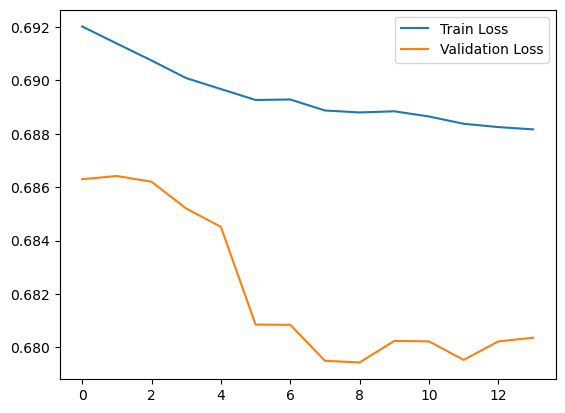

10/10 [==============================] - 1s 6ms/step


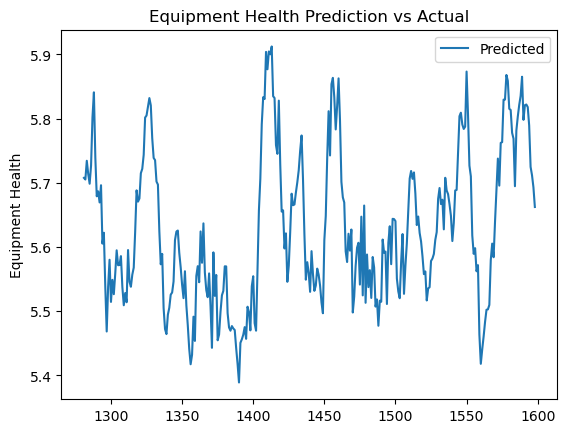

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load your dataset
# Assume you have a CSV file with columns 'timestamp', 'sensor1', 'sensor2', ..., 'failure'
# 'failure' is the binary indicator (0 or 1) of equipment failure
dataset = pd.read_csv('winequality-red.csv')


# Feature scaling
scaler = MinMaxScaler()
dataset_scaled = scaler.fit_transform(dataset)

# Prepare data for LSTM
X, y = [], []
sequence_length = 10  # Adjust as needed

for i in range(len(dataset_scaled) - sequence_length):
    X.append(dataset_scaled[i:i + sequence_length])
    y.append(dataset_scaled[i + sequence_length, -1])

X, y = np.array(X), np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=10, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions back to original scale
y_pred_original = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_pred.reshape(-1, 1)), axis=1))[:, -1]

# Visualize predictions vs actual failures
plt.plot(dataset.index[-len(y_pred_original):], y_pred_original, label='Predicted')

plt.ylabel('Equipment Health')
plt.title('Equipment Health Prediction vs Actual')
plt.legend()
plt.show()


In [2]:
dataset = pd.read_csv('winequality-red.csv')


In [3]:
scaler = MinMaxScaler()
dataset_scaled = scaler.fit_transform(dataset)


In [4]:
X, y = [], []
sequence_length = 10

In [5]:
for i in range(len(dataset_scaled) - sequence_length):
    X.append(dataset_scaled[i:i + sequence_length])
    y.append(dataset_scaled[i + sequence_length, -1])


In [6]:
X, y = np.array(X), np.array(y)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [8]:
model = Sequential()
model.add(LSTM(units=10, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [9]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [10]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50
32/32 [==============================] - 6s 54ms/step - loss: 0.6917 - accuracy: 0.0098 - val_loss: 0.6876 - val_accuracy: 0.0196
Epoch 2/50
32/32 [==============================] - 0s 12ms/step - loss: 0.6912 - accuracy: 0.0098 - val_loss: 0.6871 - val_accuracy: 0.0196
Epoch 3/50
32/32 [==============================] - 1s 18ms/step - loss: 0.6906 - accuracy: 0.0098 - val_loss: 0.6852 - val_accuracy: 0.0196
Epoch 4/50
32/32 [==============================] - 0s 13ms/step - loss: 0.6902 - accuracy: 0.0098 - val_loss: 0.6853 - val_accuracy: 0.0196
Epoch 5/50
32/32 [==============================] - 0s 12ms/step - loss: 0.6899 - accuracy: 0.0098 - val_loss: 0.6865 - val_accuracy: 0.0157
Epoch 6/50
32/32 [==============================] - 0s 12ms/step - loss: 0.6901 - accuracy: 0.0108 - val_loss: 0.6810 - val_accuracy: 0.0196
Epoch 7/50
32/32 [==============================] - 0s 13ms/step - loss: 0.6894 - accuracy: 0.0108 - val_loss: 0.6856 - val_accuracy: 0.0157
Epoch 8/50
32

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

10/10 [==============================] - 0s 7ms/step - loss: 0.6949 - accuracy: 0.0094
Model Accuracy: 0.94%


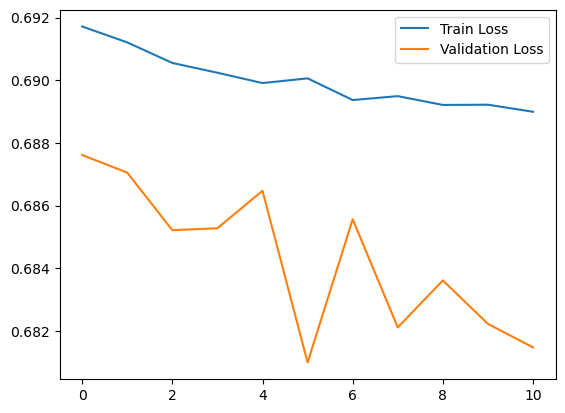

In [12]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [13]:
y_pred = model.predict(X_test)


10/10 [==============================] - 1s 6ms/step


In [14]:
y_pred_original = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_pred.reshape(-1, 1)), axis=1))[:, -1]


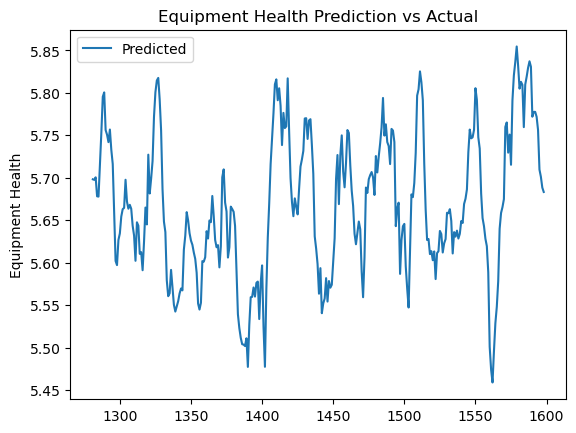

In [15]:
plt.plot(dataset.index[-len(y_pred_original):], y_pred_original, label='Predicted')

plt.ylabel('Equipment Health')
plt.title('Equipment Health Prediction vs Actual')
plt.legend()
plt.show()
